<font size="5" color="blue">**Importing Libraries**</font>


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

<font size="5" color="blue">**1. Loading Dataset from Github repository.**
</font>


In [2]:
#import dataset as Excel
# The file URL of the Excel file on GitHub
file_url = "https://github.com/AdityaPatel1068/DMA/raw/main/Assignment_Restaurant%20Project.xlsx"

# Download the file to a temporary location
response = requests.get(file_url)
with open("/tmp/excel_file.xlsx", "wb") as f:
    f.write(response.content)

# Read the Excel file into Pandas, specifying the engine
data_sheet_name = 'DATA'
raw_data = pd.read_excel("/tmp/excel_file.xlsx", sheet_name=data_sheet_name, engine="openpyxl")

# Read the 'resturant_price_data' sheet for restaurant price data
Estimate_price_sheet_name = 'resturant_price_data'
Estimate_price_data = pd.read_excel("/tmp/excel_file.xlsx", sheet_name=Estimate_price_sheet_name, engine="openpyxl")

# Verify the data
print("Resturant Data sheet ('DATA' sheet):")
print(raw_data.describe())

print("\n Estimate Price Data sheet ('resturant_price_data' sheet):")
print(Estimate_price_data.describe())

Resturant Data sheet ('DATA' sheet):
             App  Take Out Service    Area Income  Town Population  \
count  99.000000         99.000000      99.000000        99.000000   
mean    0.555556          0.525253   86741.717172    145353.535354   
std     0.499433          0.501903   26711.461224     67284.245227   
min     0.000000          0.000000   49000.000000     30000.000000   
25%     0.000000          0.000000   66121.500000    100000.000000   
50%     1.000000          1.000000   81394.000000    130000.000000   
75%     1.000000          1.000000  100184.500000    190000.000000   
max     1.000000          1.000000  165000.000000    330000.000000   

       Outdoor Dining  Distance from Town Center  Monthly Revenue  
count       99.000000                  99.000000        99.000000  
mean         0.181818                   4.207273    287303.360429  
std          0.387657                   1.681928    171543.931037  
min          0.000000                   1.790000     25250.0

<br><br><br><font size="5" color="blue">**2. Pre Processing the data**</font>


1) <font color="red">Data Cleaning </font>
2) <font color="red">Data Transformation</font>
3) <font color="red">Data Splitting</font>


<br><br><br><font color="red">**1. Data Cleaning**</font>
<br> <font color="teal">
Handling missing values: Impute missing data using techniques like mean, median, or interpolation.</font>
<br><font color="teal">
Outlier detection and treatment: Identify and handle outliers using IQR and replacing them by Mean value</font>

In [3]:
### Data Cleaning 
#Missing Values & Outliers

# Create a new DataFrame without the "Restaurants" column
data = raw_data.drop(columns=["Restaurants"])

# Create a copy of the original DataFrame to keep the main data file unchanged
cleaned_data = data.copy()


# Calculate the number of missing values in each column
missing_values = data.isnull().sum()

# Define a function to detect outliers using the IQR method
def detect_outliers(column):
        if column.nunique() > 2:  # Check if it's not binary
            Q1 = column.quantile(0.25)
            Q3 = column.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = ((column < lower_bound) | (column > upper_bound))
            return outliers.sum()
        else:
            return 0
# Calculate the number of outliers in each column
outliers_count = data.apply(detect_outliers)


# Define function to replace outliers with the mean value using the IQR method
def replace_outliers_with_mean(column):
    if column.nunique() > 2:  # Check if it's not binary
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the mean of the column
        cleaned_column = column.apply(lambda x: column.mean() if (x < lower_bound) or (x > upper_bound) else x)
    else:
        cleaned_column = column
    return cleaned_column

# Replace outliers with the mean in each column
cleaned_data = cleaned_data.apply(replace_outliers_with_mean)
outliers_replaced = data.ne(cleaned_data).sum().sum()


# Print the results
print("Number of missing values in each column:")
print(missing_values)

print("\nNumber of outliers in each column:")
print(outliers_count)

print(f"Number of outliers replaced with the mean: {outliers_replaced}")

Number of missing values in each column:
App                          0
Take Out Service             0
Area Income                  0
Town Population              0
Outdoor Dining               0
Distance from Town Center    0
Monthly Revenue              0
dtype: int64

Number of outliers in each column:
App                          0
Take Out Service             0
Area Income                  2
Town Population              1
Outdoor Dining               0
Distance from Town Center    0
Monthly Revenue              1
dtype: int64
Number of outliers replaced with the mean: 4


<font color="orange">Based on above results </font>
1) <font color="orange">Dataset has no null value </font>
2) <font color="orange">4 outliers from Town Population, Monthly Revenue and Area Income should be replaced by mean Values.</font>


<br><br>
<font color="red">**2. Data Transformation**</font><br>
<font color="teal">Feature scaling: Scale numerical features to a standard range by standardization.<br></font>


In [4]:
#Divide the dataset into target and Feature columns

target_column = cleaned_data["Monthly Revenue"]
feature_columns = cleaned_data.drop("Monthly Revenue", axis=1)


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature columns
transformed_columns = scaler.fit_transform(feature_columns)


<br><font color="red">**3. Data Splitting**<br></font>
<font color="teal">Split data into training, validation, and test sets for model evaluation<br></font>


In [5]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_columns, target_column, test_size=0.20, random_state=24)


<br><font size="5" color="blue">**3. Model Selection:**<br></font>
<font color="teal">   - Linear regression and Neural Network<br></font><br>




<br><font size="5" color="blue">**4. Model Training:**<br></font>
<font color="red">   - Train the selected model using the training dataset to learn patterns and relationships in the data<br></font><br>

<font color="green">1. Linear Regression</font>


In [13]:
#linear regression model
# Initialize and train a Linear Regression model using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Linear Regression Model 
y_pred1 = model1.predict(X_test)

import statsmodels.api as sm

# Assuming you have defined your variables X_train and y_train

# Add a constant (intercept) to the features
X_train_with_const = sm.add_constant(X_train)

# Create and fit the OLS model
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()

# Print the summary including p-values
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        Monthly Revenue   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     37.12
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           3.77e-20
Time:                        00:12:53   Log-Likelihood:                -1006.4
No. Observations:                  79   AIC:                             2027.
Df Residuals:                      72   BIC:                             2043.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.841e+05   9811.284     28.952      0.0

<br><font color="green">2. Neural Network</font>


In [11]:
#Neural Network Model
model2 = Sequential()
model2.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=1, activation='linear'))

# Compile the model
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.summary()

# Train the model
model2.fit(X_train, y_train, epochs=500, batch_size=5, verbose=0)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<br><font size="5" color="Blue">**5. Model Evaluation:**</font><br>
<font color="red"> - Assess the model's performance using evaluation metrics</font> <br>
<font color="red"> - MSE error</font><br>
<font color="red"> - R-squared (R²) for regression.</font><br>



1/1 [==============================] - 0s 56ms/step
Mean Squared Error for Linear regression: 8297763755.269972
Mean Squared Error for the Neural Network model: 10874739811.951977
R-squared for Linear Regression: 0.5442572885943928
R-squared for Neural Network: 0.40272059389713877


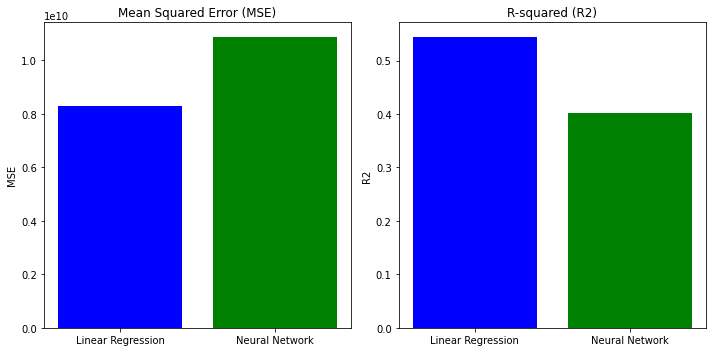

In [8]:
# Evaluate the model on the testing data
y_pred1 = model1.predict(X_test) # Linear Regression Model
y_pred2 = model2.predict(X_test) # Neural Network Model

# Calculate the Mean Squared Error to evaluate the model's performance
mse1 = mean_squared_error(y_test, y_pred1) # Linear Regression Model
mse2 = mean_squared_error(y_test, y_pred2) # Neural Network Model
print(f"Mean Squared Error for Linear regression: {mse1}")
print(f"Mean Squared Error for the Neural Network model: {mse2}")

# Evaluate the models for regression
r2_1 = r2_score(y_test, y_pred1)
r2_2 = r2_score(y_test, y_pred2)
print(f"R-squared for Linear Regression: {r2_1}")
print(f"R-squared for Neural Network: {r2_2}")





import matplotlib.pyplot as plt

# Define the models and their corresponding MSE and R2 values
models = ["Linear Regression", "Neural Network"]
mse_values = [mse1, mse2]
r2_values = [r2_1, r2_2]

# Create subplots for MSE and R2
plt.figure(figsize=(10, 5))

# Bar chart for MSE
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Bar chart for R2
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('R-squared (R2)')
plt.ylabel('R2')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


<br><br><font size="5" color="Blue">**6. Model Testing:**</font>
<font color="teal"><br>- Evaluate the model on a restaurant_price_data dataset to assess its generalization to new, unseen data.</font> 



In [9]:
# Preprocess the new data (assuming you used 'scaler' for feature scaling)
new_data = Estimate_price_data.drop(["Monthly Revenue", "Restaurants"], axis=1)  # Drop both the target column and "Restaurants"
new_data_processed = scaler.transform(new_data)

# Predict prices using Linear Regression
predicted_prices_linear = model1.predict(new_data_processed)

# Predict prices using Neural Network
predicted_prices_neural = model2.predict(new_data_processed)

# Add columns for predicted prices to the original DataFrame
Estimate_price_data["Predicted_Price_Linear"] = predicted_prices_linear
Estimate_price_data["Predicted_Price_Neural"] = predicted_prices_neural
Estimate_price_data.drop(["Monthly Revenue", "App", "Take Out Service", "Area Income", "Town Population", "Outdoor Dining", "Distance from Town Center"], axis=1, inplace=True)


# Print the DataFrame with updated columns for predictions
print("Original Data with Predicted Prices (Linear Regression and Neural Network):")
print(Estimate_price_data.to_string(index=False))


1/1 [==============================] - 0s 16ms/step
Original Data with Predicted Prices (Linear Regression and Neural Network):
Restaurants  Predicted_Price_Linear  Predicted_Price_Neural
        PPI           154017.941560            29168.218750
        TRE           398779.116627           386294.937500
        GGT           365408.652827           348224.218750
        MND           327279.894986           288490.406250
        WRT           549942.658990           523541.343750
        GFR           197322.649469           175177.031250
        WWW           410709.133116           314757.781250
        QWE           236309.735477           179476.875000
        FGR           171534.572003           152448.843750
        SSC           128441.842383            20471.687500
        SAE           310227.451432           119573.617188


<br><br><font size="5" color="Blue">**7. Visualization:**</font>


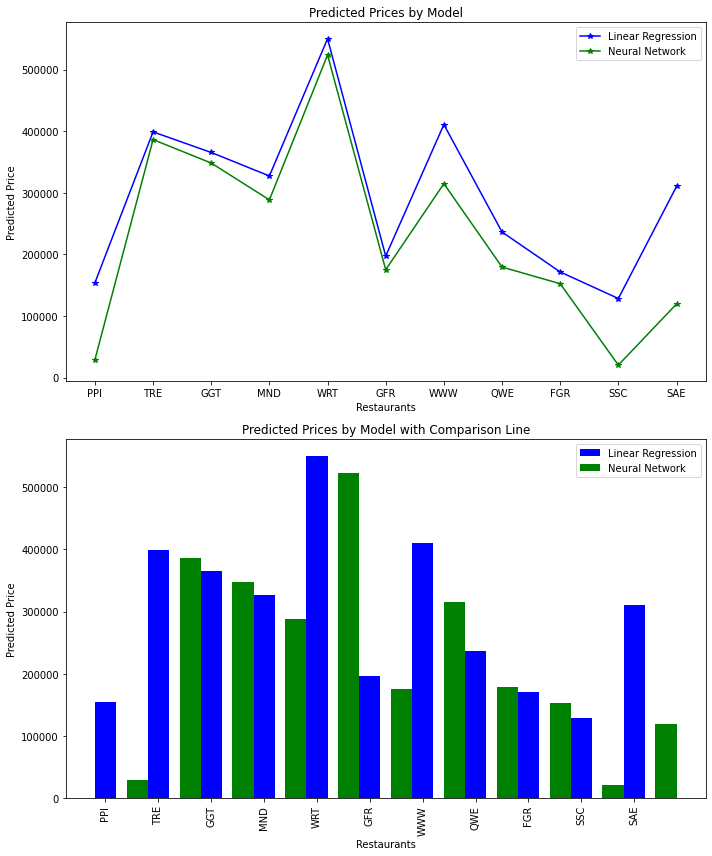

In [10]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Subplot 1: Line graph
# Data
restaurants = Estimate_price_data["Restaurants"]
predicted_linear = Estimate_price_data["Predicted_Price_Linear"]
predicted_neural = Estimate_price_data["Predicted_Price_Neural"]

# Plot the predicted prices from Linear Regression with stars
ax1.plot(restaurants, predicted_linear, marker='*', linestyle='-', color='b', label='Linear Regression')

# Plot the predicted prices from Neural Network with stars
ax1.plot(restaurants, predicted_neural, marker='*', linestyle='-', color='g', label='Neural Network')

# Set labels and title
ax1.set_xlabel('Restaurants')
ax1.set_ylabel('Predicted Price')
ax1.set_title('Predicted Prices by Model')

# Add a legend
ax1.legend()

# Subplot 2: Bar graph
# Data
restaurants = Estimate_price_data["Restaurants"]
predicted_linear = Estimate_price_data["Predicted_Price_Linear"]
predicted_neural = Estimate_price_data["Predicted_Price_Neural"]

# Bar positions for Linear Regression
x1 = range(len(restaurants))

# Bar positions for Neural Network
x2 = [pos + 0.4 for pos in x1]

# Create bars
ax2.bar(x1, predicted_linear, width=0.4, label='Linear Regression', align='center', color='b')
ax2.bar(x2, predicted_neural, width=0.4, label='Neural Network', align='edge', color='g')

# Set labels and title
ax2.set_xlabel('Restaurants')
ax2.set_ylabel('Predicted Price')
ax2.set_title('Predicted Prices by Model with Comparison Line')

# Set x-axis labels
ax2.set_xticks(x1)
ax2.set_xticklabels(restaurants, rotation=90)

# Add a legend
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()


<br><br><font size="5" color="Blue">8. **Documentation and Reporting:**</font>
<BR>
    - Document the entire pipeline, including data preprocessing, model details, hyperparameters, and evaluation results.
